# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 2: MINERÍA DE DATOS  
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Grimaldi, Damián - ()
### **Fecha Límite de Entrega:** 21/05/2025  
### **Semestre:** 1° Semestre 2025


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ejercicio 1. EDA Companias

**VARIABLES**

RyD_Spend -> Gasto en Investigación y Desarrollo (cantidad de dinero invertido)  
Administracion -> Gasto en Administración (cantidad de dinero invertido en funciones administrativas)  
MarketingSpend -> Gasto en Marketing (cantidad de dinero invertido en Marketing)  
Profit -> Ganancias obtenidas ( ganancias netas de la empresa luego de los gastos)  


In [4]:
companias = pd.read_csv('1000_Companies.csv')
companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Podemos observar que no hay nulos
companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
companias.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


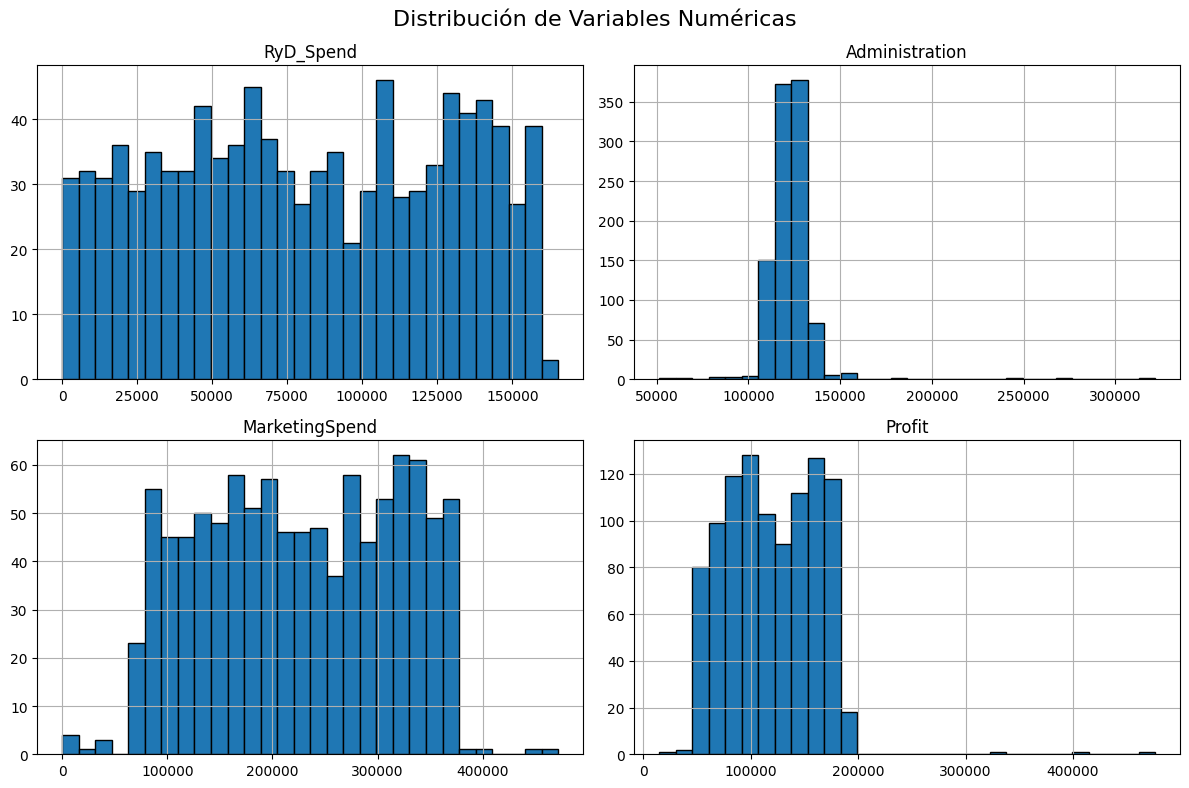

In [9]:
# Histograma de variables numéricas
num_vars = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']
companias[num_vars].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

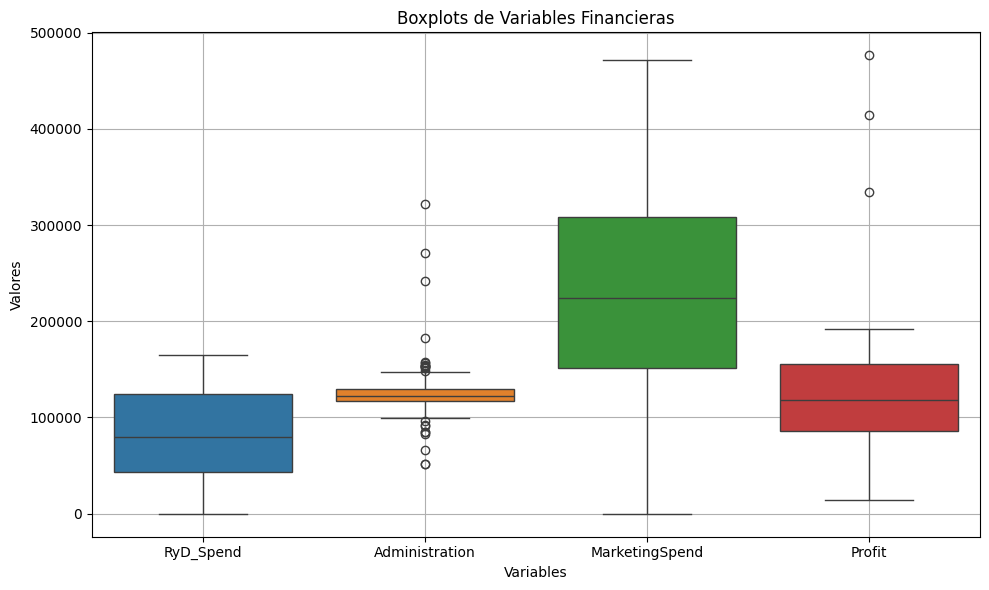

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=companias[num_vars])
plt.title('Boxplots de Variables Financieras')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

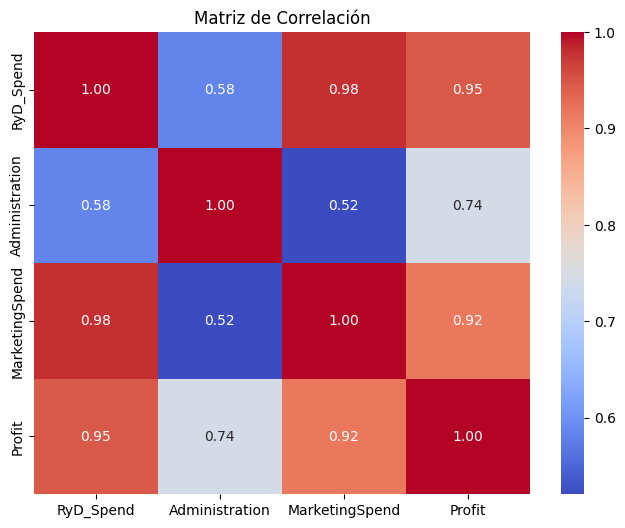

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(companias[num_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


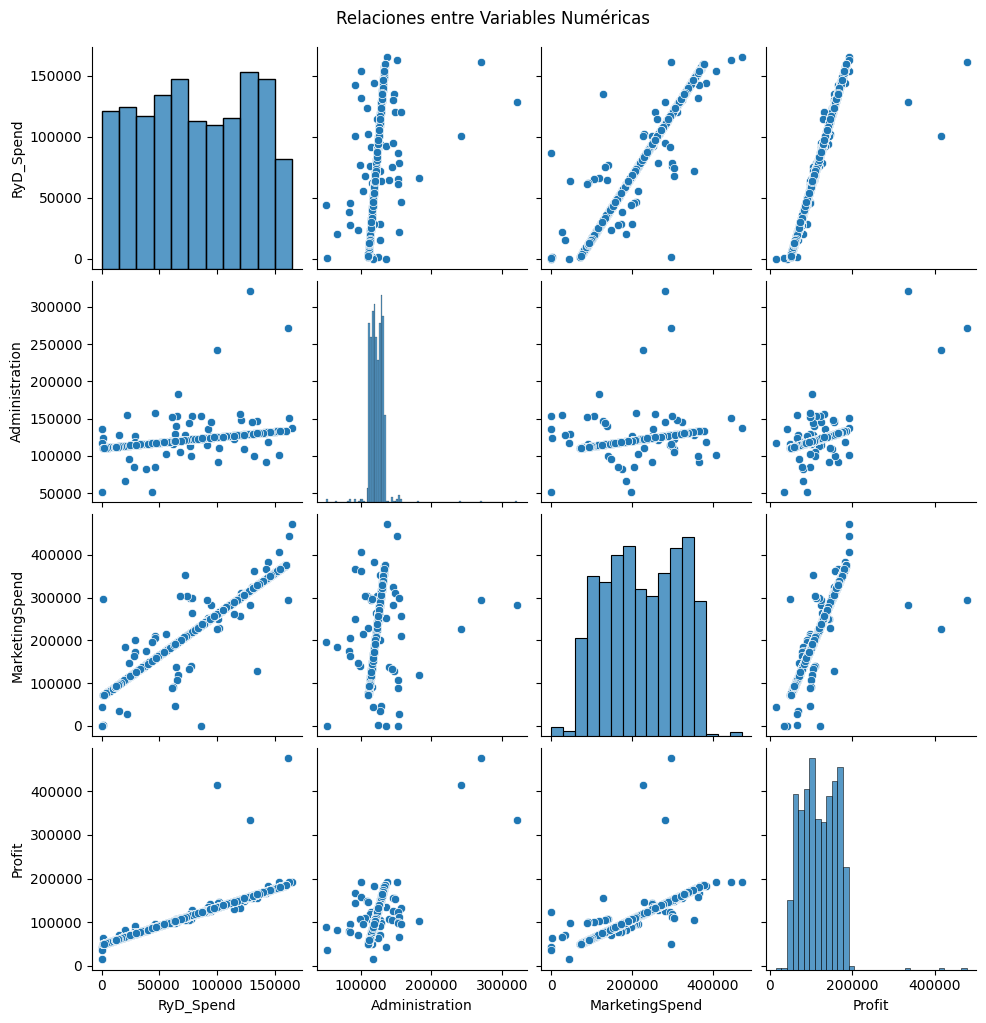

In [ ]:
sns.pairplot(companias[num_vars])
plt.suptitle('Relaciones entre Variables Numéricas', y=1.02)
plt.show()

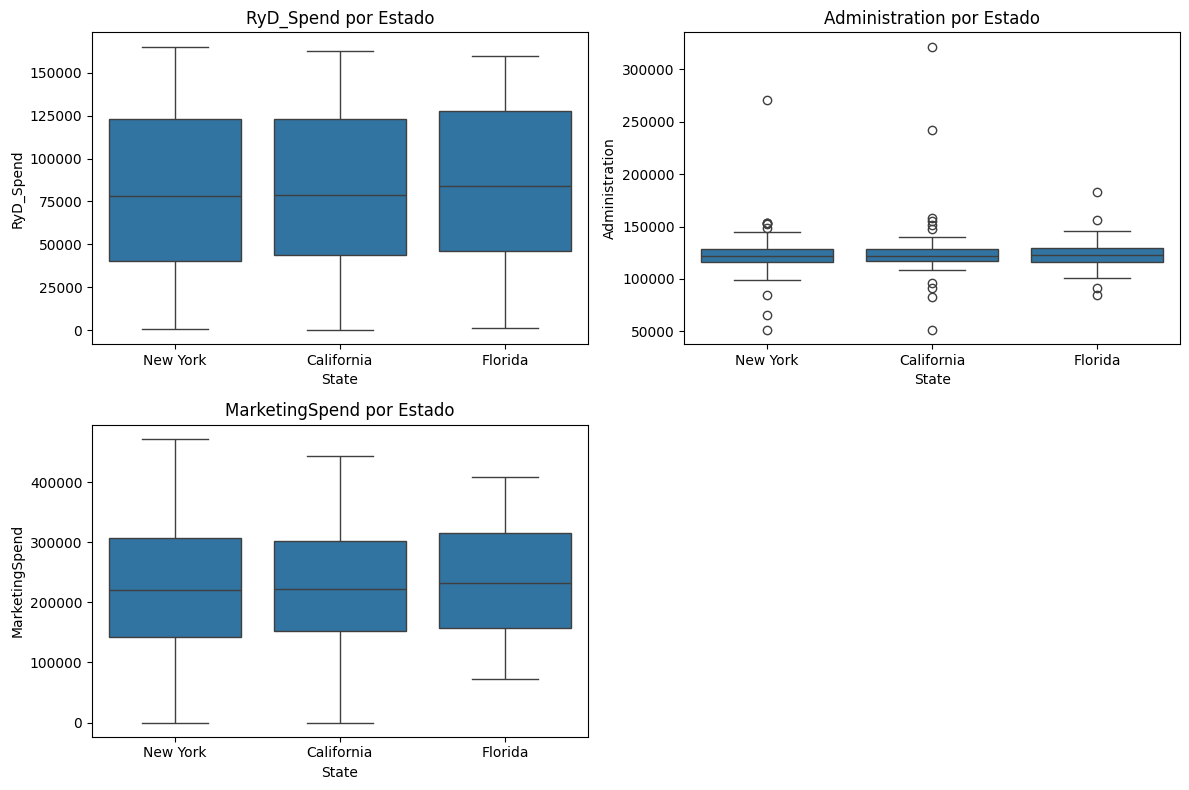

In [ ]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars[:-1], 1):  # sin Profit
    plt.subplot(2, 2, i)
    sns.boxplot(x='State', y=var, data=companias)
    plt.title(f'{var} por Estado')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [13]:
companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\Lucas\AppData\Local\Temp\ipykernel_10664\3155018823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=companias, x='State', palette='Set1')


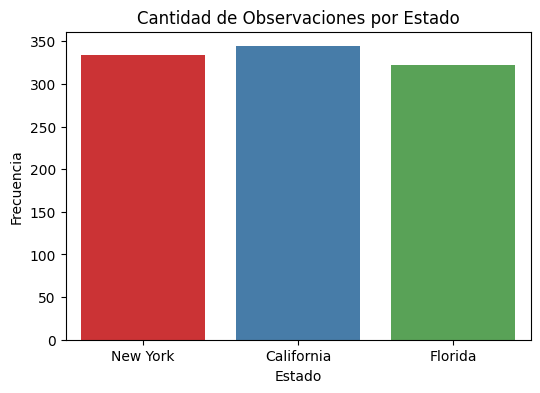

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=companias, x='State', palette='Set1')
plt.title('Cantidad de Observaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.show()


# Particion de los Datos

In [ ]:
# Definimos las features relevantes y la variable target
features = [
    'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
]
target = 'Profit'

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas
X_train, X_test, y_train, y_test = train_test_split(companias[features], companias[target], test_size=0.2, random_state=42)

# Codificacion

In [ ]:
# Aplicamos get_dummies a ambas particiones, asegurando que tengan las mismas columnas
X_train_codificado = pd.get_dummies(X_train, columns=['State'], drop_first=True)
X_test_codificado = pd.get_dummies(X_test, columns=['State'], drop_first=True)

# Alineamos las columnas para evitar errores en el modelo
X_train_codificado, X_test_codificado = X_train_codificado.align(X_test_codificado, join='left', axis=1, fill_value=0)


# Escalado

In [ ]:
# Columnas a escalar
columnas_a_escalar = ['RyD_Spend', 'Administration', 'MarketingSpend']

# Inicializamos el escalador
scaler = StandardScaler()

# Creamos copias para no modificar los originales
X_train_escalado = X_train_codificado.copy()
X_test_escalado = X_test_codificado.copy()

# Ajustamos y transformamos solo las columnas numéricas del entrenamiento
X_train_escalado[columnas_a_escalar] = scaler.fit_transform(X_train_escalado[columnas_a_escalar])

# Usamos el mismo escalador para transformar el test
X_test_escalado[columnas_a_escalar] = scaler.transform(X_test_escalado[columnas_a_escalar])


# Ejercicio 2. Prediccion con Arboles de Decisión

# EDA Tipos de Droga

In [ ]:
drogas = pd.read_csv('drugType.csv')
drogas.head()

,Edad,Sexo,BP,Colesterol,Na_a_K,Droga
0,23,F,Alto,Alto,25.355,DrogaY
1,47,M,Bajo,Alto,13.093,DrogaC
2,47,M,Bajo,Alto,10.114,DrogaC
3,28,F,Normal,Alto,7.798,DrogaX
4,61,F,Bajo,Alto,18.043,DrogaY


In [ ]:
drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edad        200 non-null    int64  
 1   Sexo        200 non-null    object 
 2   BP          200 non-null    object 
 3   Colesterol  200 non-null    object 
 4   Na_a_K      200 non-null    float64
 5   Droga       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
